In [1]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor as rfr

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/delhi-air-quality-dataset/final_dataset.csv


In [3]:
path = r'/kaggle/input/delhi-air-quality-dataset/final_dataset.csv'
df = pd.read_csv(path)

In [4]:
df.columns

Index(['Date', 'Month', 'Year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI'],
      dtype='object')

In [5]:
df.head()

,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [6]:
df = df.rename(columns = {'Date' : 'day','Month' : 'month','Year' : 'year'})

In [7]:
df['Timestamp'] = pd.to_datetime(df[['year','month','day']])

In [8]:
df.columns

Index(['day', 'month', 'year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI', 'Timestamp'],
      dtype='object')

In [9]:
data = df[['Timestamp','AQI','PM2.5','PM10','CO','SO2','Ozone','NO2']].sort_values(by = 'Timestamp',ascending = True)

### Serial trend of the season 

In [10]:
def show_trend(cols):
    for col in cols:
        plt.figure(figsize = (12,6))
        plt.subplot(2, 2, 4)
        plt.plot(df['Timestamp'], df[col], marker='o',markersize = 1, linestyle='-', color='purple')
        plt.title(f'{col} over time', fontsize=16)
        plt.xlabel('Date')
        plt.ylabel(f'{col}')
        plt.xticks(rotation=45)
        plt.grid(True)

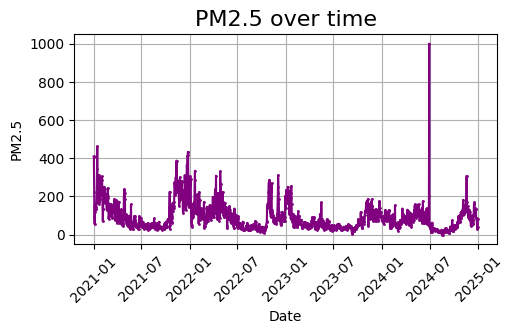

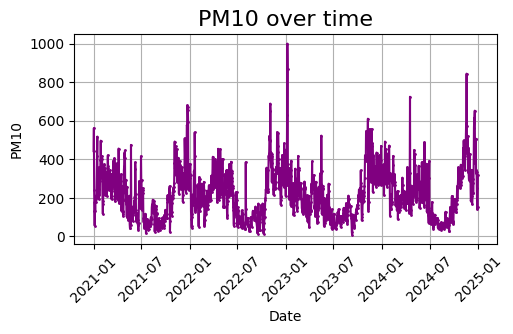

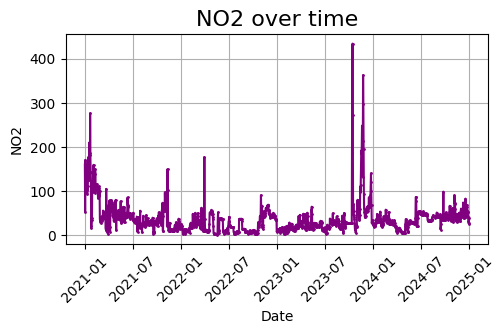

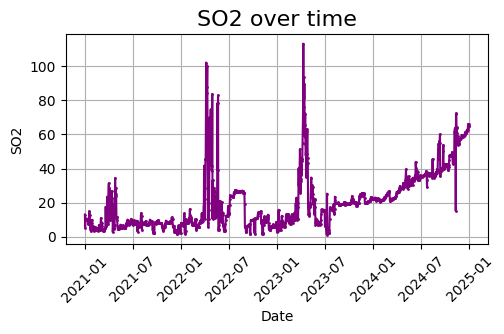

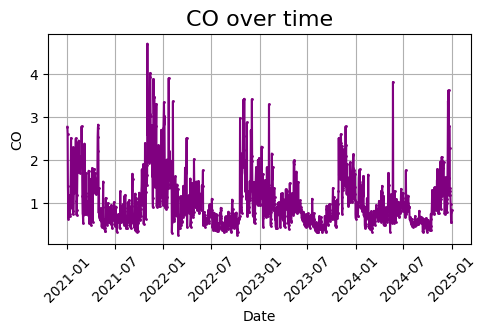

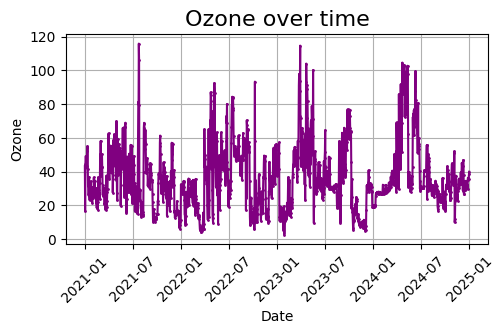

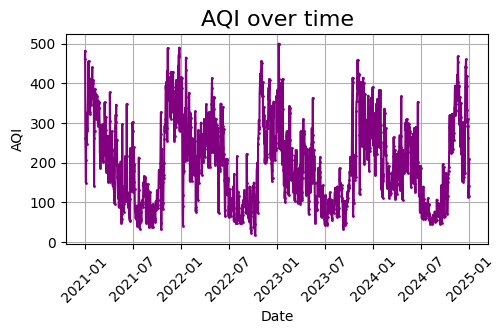

In [11]:
cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
show_trend(cols)

In [12]:
### Correlation between Pollutants and AQI 
pollutant_cols = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone', 'AQI']
correlation_matrix = df[pollutant_cols].corr()
print(correlation_matrix)

          PM2.5      PM10       NO2       SO2        CO     Ozone       AQI
PM2.5  1.000000  0.721745  0.245283 -0.082946  0.690090 -0.159882  0.801960
PM10   0.721745  1.000000  0.270478  0.131045  0.647241 -0.152054  0.899421
NO2    0.245283  0.270478  1.000000  0.057626  0.329214 -0.155068  0.319261
SO2   -0.082946  0.131045  0.057626  1.000000 -0.068631  0.188534  0.036288
CO     0.690090  0.647241  0.329214 -0.068631  1.000000 -0.199935  0.696809
Ozone -0.159882 -0.152054 -0.155068  0.188534 -0.199935  1.000000 -0.164281
AQI    0.801960  0.899421  0.319261  0.036288  0.696809 -0.164281  1.000000


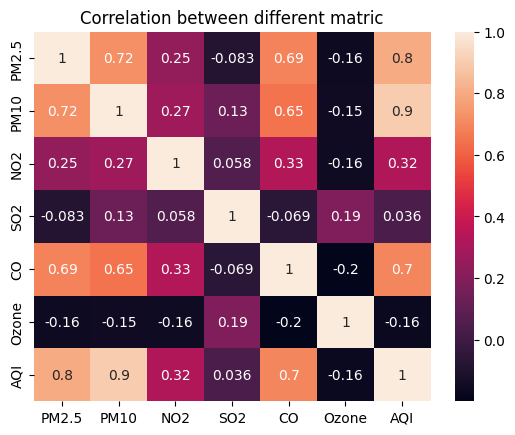

In [13]:
sns.heatmap(correlation_matrix,annot = True)
plt.title("Correlation between different matric")
plt.show()

### Correlation between PM2.5 and AQI is highest which is 0.8
### Correlation between PM10 and AQI is highest which is 0.9
### Correlation between CO and AQI highest which 0.7

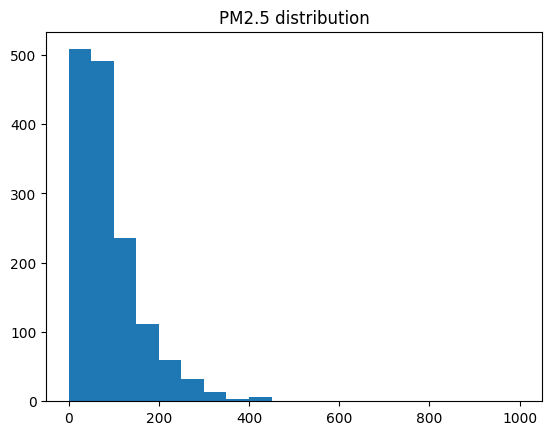

In [14]:
### Distribution of PM2.5
plt.hist(df['PM2.5'],bins = 20)
plt.title("PM2.5 distribution")
plt.show()

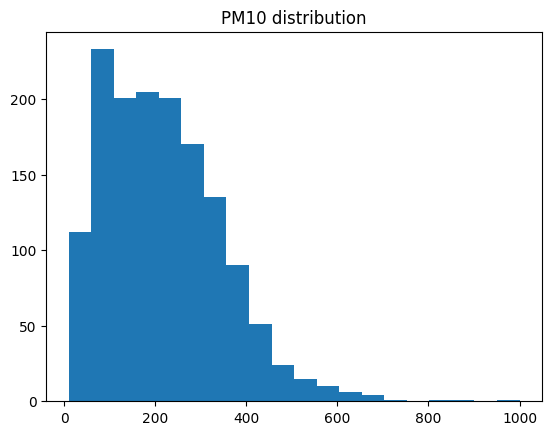

In [15]:
plt.hist(df['PM10'],bins = 20)
plt.title('PM10 distribution')
plt.show()

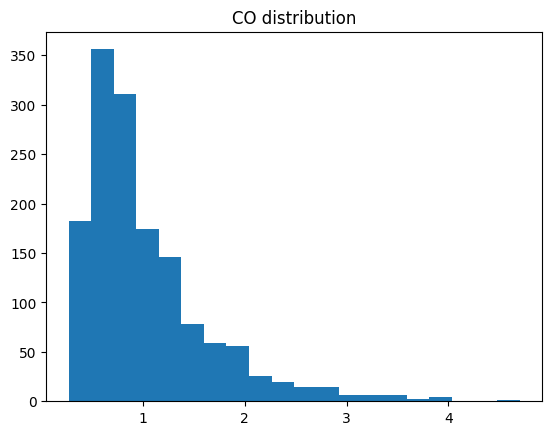

In [16]:
plt.hist(df['CO'],bins = 20)
plt.title('CO distribution')
plt.show()

In [17]:
df.columns

Index(['day', 'month', 'year', 'Holidays_Count', 'Days', 'PM2.5', 'PM10',
       'NO2', 'SO2', 'CO', 'Ozone', 'AQI', 'Timestamp'],
      dtype='object')

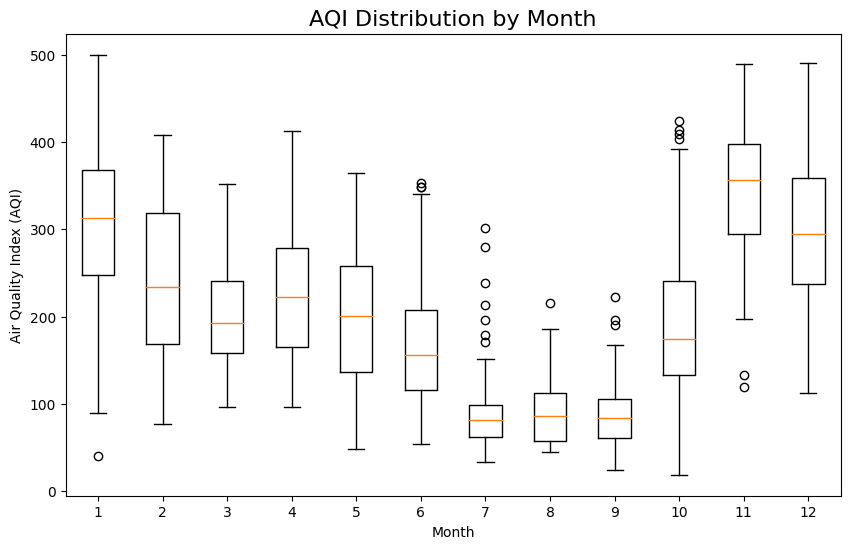

In [18]:
months = sorted(df['month'].unique())

data = [df.loc[df['month'] == month, 'AQI'].values for month in months]

plt.figure(figsize=(10, 6))

plt.boxplot(data, labels=months)

plt.title('AQI Distribution by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Air Quality Index (AQI)')

plt.show()

In [19]:
### Choosing the single correlated features 
print("Correlation Table")
correlation_frame = pd.DataFrame(df.corr()['AQI'].drop('AQI').sort_values(ascending = False))
correlation_frame.columns = ['Correlation with AQI']
correlation_frame

Correlation Table


,Correlation with AQI
PM10,0.899421
PM2.5,0.801960
CO,0.696809
NO2,0.319261
SO2,0.036288
Days,0.002113
Holidays_Count,0.000447
day,-0.001057
month,-0.034169
year,-0.083563


In [20]:
X = df[['PM10','PM2.5']]
y = df['AQI']

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,train_size = 0.8)

In [22]:
# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()
# X_train_scaled = scaler.fit_transform(np.array(X_train).reshape(-1,1))
# X_test_scaled = scaler.fit_transform(np.array(X_test).reshape(-1,1))

In [23]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression()
model.fit(X_train,y_train)

y_predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,y_predict))
print('Root mean squared error:',rmse)

Root mean squared error: 39.503736789733175


In [24]:
print("AQI Min:",df['AQI'].min())
print("AQI Max:",df['AQI'].max())
print("AQI std dev:",df['AQI'].std())

AQI Min: 19
AQI Max: 500
AQI std dev: 107.80107589981662


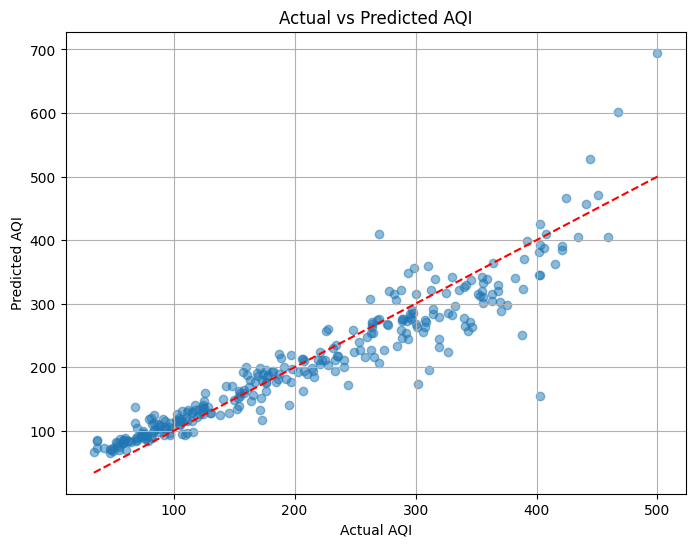

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_predict, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Actual AQI')
plt.ylabel('Predicted AQI')
plt.title('Actual vs Predicted AQI')
plt.grid(True)
plt.show()

In [26]:
features = ['PM2.5', 'PM10', 'CO']
X = df[features]
y = df['AQI']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)


def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Regression")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.4f}")
    print("-" * 30)

evaluate_model("Ridge", y_test, y_pred_ridge)
evaluate_model("Lasso", y_test, y_pred_lasso)

Ridge Regression
  RMSE: 38.94
  R²: 0.8832
------------------------------
Lasso Regression
  RMSE: 38.95
  R²: 0.8831
------------------------------


In [27]:
model = rfr()

model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [28]:
evaluate_model("Random Forest Regressor", y_test, y_predict)

Random Forest Regressor Regression
  RMSE: 31.00
  R²: 0.9260
------------------------------


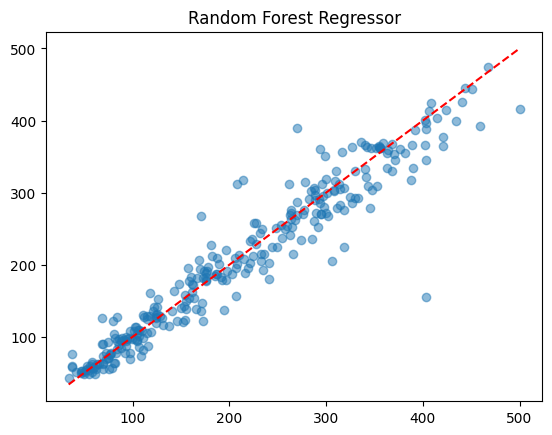

In [29]:
plt.scatter(y_test,y_predict,alpha = 0.5)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'--r')
plt.title("Random Forest Regressor")
plt.show()

In [30]:
importances = model.feature_importances_

In [31]:
type(importances)

numpy.ndarray

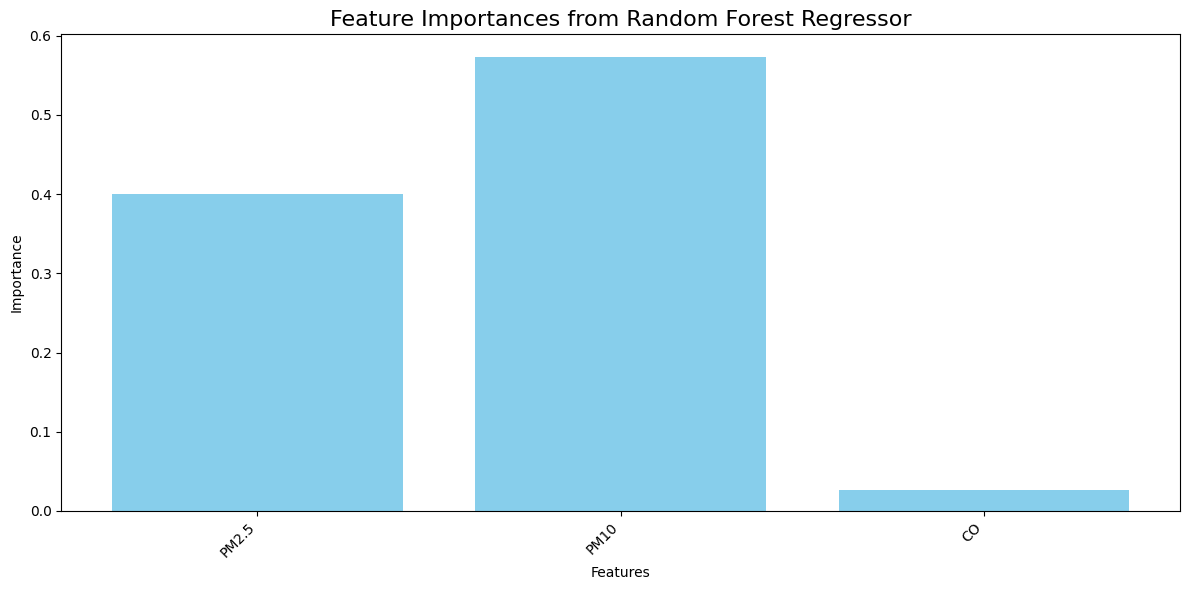

In [32]:
importances = model.feature_importances_
feature_names = X_train.columns

plt.figure(figsize=(12, 6))
plt.bar(feature_names, importances, color='skyblue')
plt.title("Feature Importances from Random Forest Regressor", fontsize=16)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()